
# Курсовая работа. Блок ML Beginner
<br>

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. Может потребоваться предварительная обработка данных.

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import re
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(10,8)})

In [2]:
df = pd.read_csv("telecom_users.csv", index_col=0)
df.index = [i for i in range(df.gender.count())]
df.head().T

,0,1,2,3,4
customerID,7010-BRBUU,9688-YGXVR,9286-DOJGF,6994-KERXL,2181-UAESM
gender,Male,Female,Female,Male,Male
SeniorCitizen,0,0,1,0,0
Partner,Yes,No,Yes,No,No
Dependents,Yes,No,No,No,No
tenure,72,44,38,4,2
PhoneService,Yes,Yes,Yes,Yes,Yes
MultipleLines,Yes,No,Yes,No,No
InternetService,No,Fiber optic,Fiber optic,DSL,DSL
OnlineSecurity,No internet service,No,No,No,Yes


*Посмотрим на тип данных колонок.*

In [3]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

*Переменные **tenure, MonthlyCharges, TotalCharges** являются количественными. Остальные переменные - категориальные.  
Нужно изменить тип данных у двух колонок **TotalCharges** и **SeniorCitizen**.*

*Переменную **SeniorCitizen** сделаем категориальной.*

In [4]:
df.SeniorCitizen.replace([1, 0], ['Yes', 'No'], inplace=True)

*Чтобы преобразовать тип данных переменной **TotalCharges**, нужно удалить или заменить, имеющие в этой колонке, пробельные значения, тип данных у которых **string**.*  
*Посчитаем их количество.*  

In [5]:
len(df[df.TotalCharges.eq(" ")].index)

10

*Таких значений 10. Просто удалим их. Разницы наша модель не почувствует.*

In [6]:
df.drop(index=df[df.TotalCharges.eq(" ")].index, inplace=True)

*Преобразуем тип данных переменной **TotalCharges** в числа с плавающей точкой.*

In [7]:
df.TotalCharges = df.TotalCharges.astype(np.float32)

*Посмотрим, имеются ли пропущенные значения в датасете.*

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

*Переменная **customerID** не понадобится, удалим ее.*

In [9]:
df.drop(columns=["customerID"], inplace=True)

*Посмотрим на категориальные признаки.*

In [10]:
df.describe(include=[object])

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976,5976
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3044,5010,3080,4195,5388,2843,2627,2982,2604,2639,2959,2388,2353,3269,3525,2006,4389


In [11]:
# список категориальных переменных
categoriсal_var = df.describe(include=[object]).columns
categoriсal_var

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

*Категориальные переменные имеют от 2-х до 4-х градаций.*

*Выделим количественные признаки.*

In [12]:
df.describe(include=['number']).round(2)

,tenure,MonthlyCharges,TotalCharges
count,5976.00,5976.00,5976.00
mean,32.52,64.85,2298.06
std,24.50,30.11,2274.13
min,1.00,18.25,18.80
25%,9.00,35.75,404.31
50%,29.00,70.43,1412.15
75%,56.00,89.90,3846.96
max,72.00,118.75,8684.80


In [13]:
# список количественных признаков
non_categorical_var = df.describe(include=['number']).columns
non_categorical_var

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

*Средние значения месячной оплаты и суммы, которую клиент заплатил за все время пользования услугами, составляют 64.85 и 2298.06 руб.*  
*50% клиентов пользуются услугами не более 29 месяцев, их месячная оплата за услуги не превышает 71 руб. и сумма, затраченная на услуги за весь период пользования, не превышает 1413 руб.*

*Посмотрим на распределение количественных данных для покинувших компанию клиентов, и оставшихся в компании клиентов.*

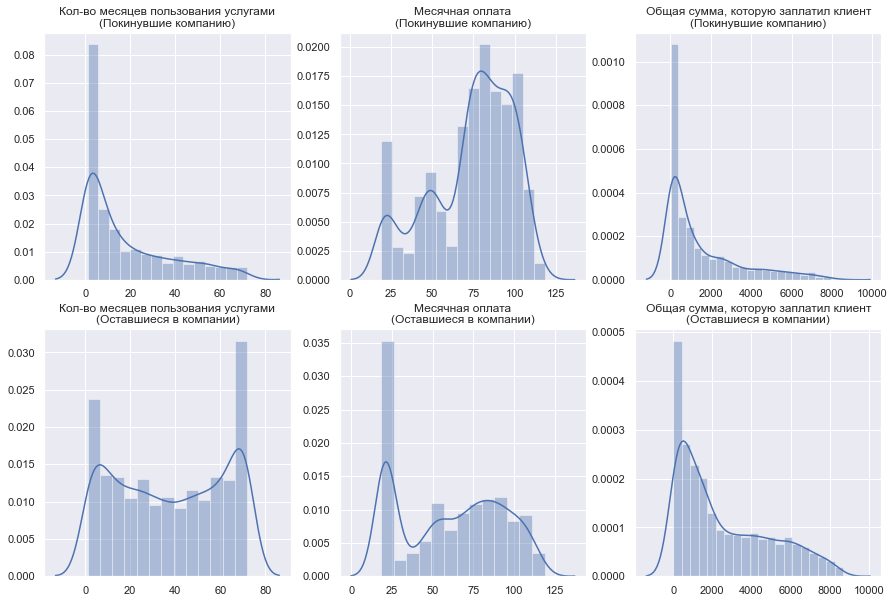

In [14]:
fig, ([ax1, ax2, ax3], [ax4, ax5, ax6]) = plt.subplots(nrows=2, ncols=3, figsize=(15, 10), subplot_kw={"xlabel": " "})
axes = [ax1, ax2, ax3, ax4, ax5, ax6]
cat = ['Yes']*3 + ['No']*3

for i, name in enumerate(df.describe().columns.append(df.describe().columns)):
    sns.distplot(df[df.Churn.eq(cat[i])][name], ax=axes[i])
    axes[i].set_xlabel("")

ax1.set(title="Кол-во месяцев пользования услугами\n(Покинувшие компанию)")
ax2.set(title="Месячная оплата\n(Покинувшие компанию)")
ax3.set(title="Общая сумма, которую заплатил клиент\n(Покинувшие компанию)")
ax4.set(title="Кол-во месяцев пользования услугами\n(Оставшиеся в компании)")
ax5.set(title="Месячная оплата\n(Оставшиеся в компании)")
ax6.set(title="Общая сумма, которую заплатил клиент\n(Оставшиеся в компании)");

*Большую долю из тех клиентов, которые покинули компанию, составляют клиенты, подключенные недавно (первый верхний график). Для клиентов, оставшихся в компании, такого дисбаланса не наблюдается (первый нижний график); выражена доля клиентов, пользующаяся услугами компании весь период жизни компании. Но гистрограмма общих расходов этой доли клиентов говорит, что месячные траты большинства клиентов были небольшими, что видно на гистрограмме **Месячной оплаты** (второй нижний график) (анализ выше нам показал, что у 50% клиентов сумма, затраченная на услуги за весь период пользования, не превышает 1413 руб.). А на гистограмме **Месячной оплаты** клиентов, покинувших компанию (второй верхний график), видно, что большая доля пользовалась дорогими услугами, т.е. клиенты подключались к интернет-провайдеру и приобретали дополнительные услуги.  
**Можно сделать короткий вывод о том, что доля клиентов, которые покинули компанию, либо подключаются для тестирования провайдера, либо им не нравится цена или качество услуг, но траты за услуги у них больше в сравнении с оставшимися в компании клиентами.**.*   

*Посмотрим на категориальные данные.*  

In [15]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [16]:
# столбцы для визуализации

list_feature = ["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "InternetService", "Contract", 
                "PaperlessBilling", "PaymentMethod"]

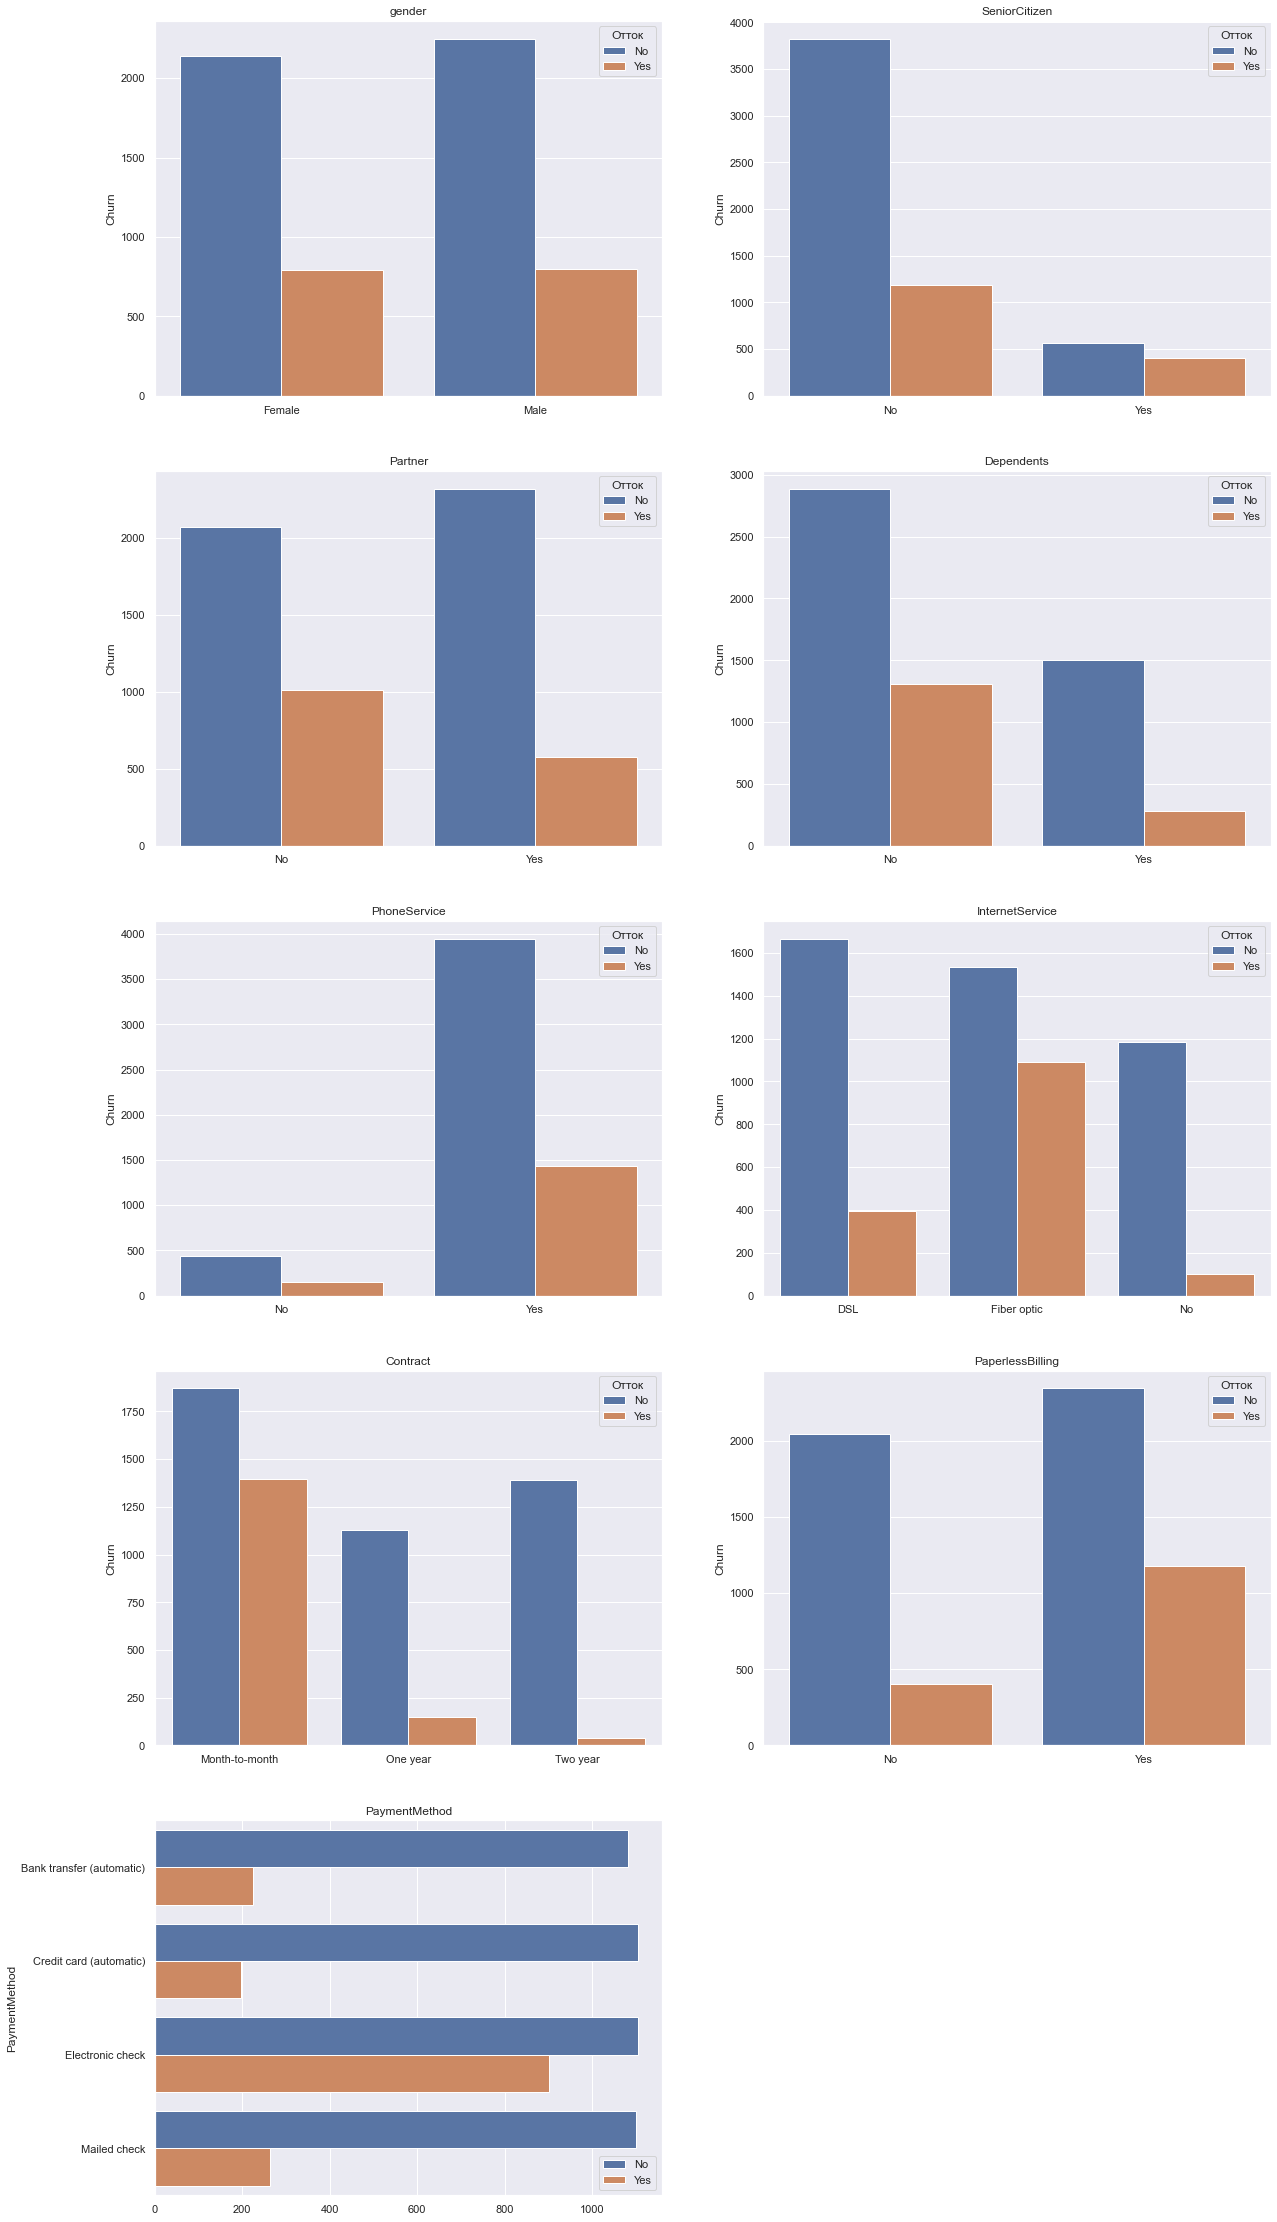

In [17]:
plt.figure(figsize=(20,40))
i = 1

for name in list_feature:
    plt.subplot(5, 2, i)
    dff = df.groupby([name, 'Churn'])\
        .agg({'Churn': len})

    dff.index.set_names([name, 'Отток'], inplace=True)
    dff.reset_index(inplace=True)
    
    if name == "PaymentMethod":
        dff.pipe((sns.barplot, 'data'), x="Churn", y=name, hue='Отток', orient="h")
        i += 1
        plt.xlabel("")
        plt.title(name)
        plt.legend(loc="best")
    else:
        dff.pipe((sns.barplot, 'data'), x=name, y='Churn', hue='Отток')
        i += 1
        plt.xlabel("")
        plt.title(name)

*Значительная доля клиентов, которые являются пенсионерами, уходит. Это может быть из-за высокой цены услуги, или причиной может быть смертность.  
Очень большой отток клиентов, которые пользовались услугой интернет-провайдера **Fiber optic**. Можно предположить, что отток происходит или по причине высокой цены, или качества услуги, или даже ввиду тестирования качества услуги провайдера, что вероятней всего должно сводится к первым двум причинам.  
Очень большой отток клиентов, пользовавшихся типом контракта **Month-to-month**. Причиной оттока может быть тестирования качества услуги провайдера, или подключение услуги по акции.  
Очень большой отток клиентов, пользовавшихся методом оплаты **Electronic check**. Причиной могут быть технические сбои при оплате. Но всегда можно переключиться на другой метод оплаты. Проверим эту гипотезу тоже.*

# 2. Исследование зависимостей и формулирование гипотез

### *Гипотезы оттока клиентов:*
* *Отток клиентов, являющихся пенсионерами, из-за финансовых сложностей или по причине смерти.*  
* *Отток клиентов, для которых услуга доступа в интернет показалась дорогой или технически нестабильной.*  
* *Отток клиентов, которые сравнивают качество услуг разных компаний или подключились по акции, поэтому используют только тип контракта **Month-to-month**.*  
* *Отток клиентов, пользующихся постоянно одним из методов оплаты, при оплате по которому возникают трудности.*

#### *Первая гипотеза: отток клиентов, являющихся пенсионерами, из-за финансовых сложностей или по причине смерти.*

In [18]:
table_SeniorCitizen = pd.crosstab(df.SeniorCitizen, df.Churn, margins=True)
table_SeniorCitizen.style.background_gradient(cmap='autumn_r')

Churn,No,Yes,All
SeniorCitizen,,,
No,3825,1185,5010
Yes,564,402,966
All,4389,1587,5976


*Покинуло компанию больше тех клиентов, которые не являлись пенсионерами (1185 чел.). И пока нельзя сделать вывод, что уходит больше тех клиентов, которые не являются пенсионерами, потому что общее количество клиентов в этой категории (5010 чел.) в 5 раз превышает общее количество клиентов другой категории (выборки несбалансированны). Поэтому посчитаем доли клиентов, покинувших компанию, по каждой категории: являющихся пенсионерами и не являющихся.*

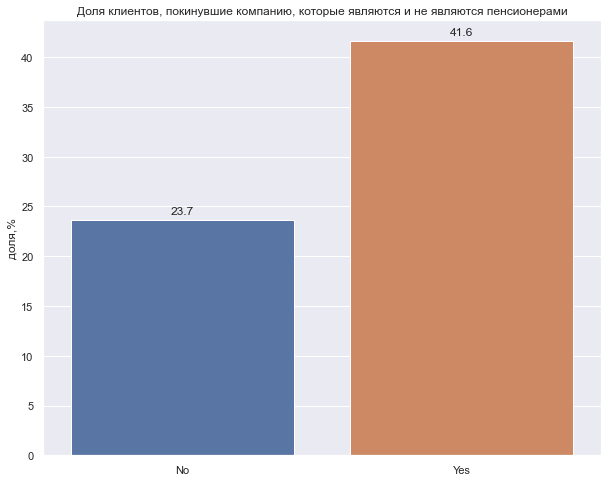

In [19]:
table = table_SeniorCitizen.iloc[:2,1] / table_SeniorCitizen.iloc[:2,2] * 100

splot = sns.barplot(x=table.index, y=table)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
splot.set(xlabel="", ylabel="доля,%", title="Доля клиентов, покинувшие компанию, которые являются и не являются пенсионерами")
    
plt.show()

*Доля клиентов, покинувших компанию, которые являлись пенсионерами, больше доли клиентов, которые не были пенсионерами. Первую гипотезу не отвергаем, которая говорит о том, что происходит отток клиентов, являющихся пенсионерами, из-за финансовых сложностей или по причине смерти.*

#### *Вторая гипотеза: отток клиентов, для которых услуга доступа в интернет показалась дорогой или технически нестабильной.*

*Проверим отток клиентов по подключению к телефонной линии.*

In [20]:
# Общий отток клиентов

df[df.Churn == "Yes"].Churn.count()

1587

In [21]:
pd.crosstab(df.PhoneService, df.Churn, margins=True).style.background_gradient(cmap='autumn_r')

Churn,No,Yes,All
PhoneService,,,
No,439,149,588
Yes,3950,1438,5388
All,4389,1587,5976


*Отток клиентов, подключенных к телефонной связи составляет 1438 чел.*

*Проверим отток клиентов по подключению к интернет провайдеру.*

In [22]:
table_InternetService = pd.crosstab(df.InternetService, df.Churn, margins=True)
table_InternetService.style.background_gradient(cmap='autumn_r')

Churn,No,Yes,All
InternetService,,,
DSL,1667,397,2064
Fiber optic,1536,1091,2627
No,1186,99,1285
All,4389,1587,5976


*Покинуло компанию больше тех клиентов, которые подключены к интернет-провайдеру **Fiber optic** (1091 чел.), но нельзя сделать вывод, что уходит больше тех клиентов, которые используют этого провайдера, потому что общее количество клиентов в категориях различается (выборки несбалансированны). Поэтому посчитаем доли клиентов, покинувших компанию, по каждой категории: **Fiber optic, DSL** и не подключенных клиентов.*

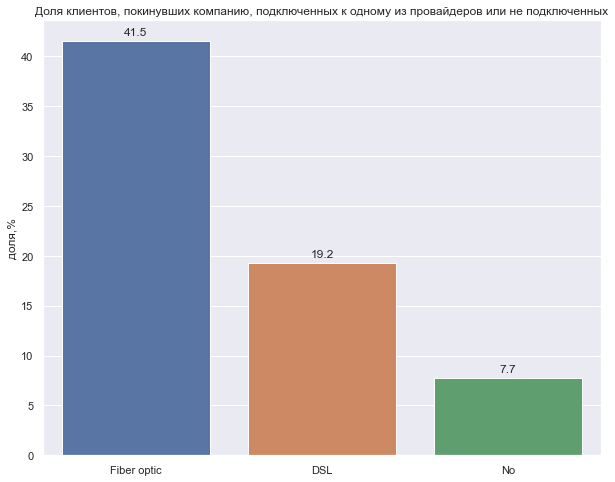

In [23]:
table = (table_InternetService.iloc[:3, 1] / table_InternetService.iloc[:3, 2] * 100).sort_values(ascending=False)

splot = sns.barplot(x=table.index, y=table)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
splot.set(xlabel="", ylabel="доля,%", title="Доля клиентов, покинувших компанию, подключенных к одному из провайдеров или не подключенных");

*Ярко выражена доля клиентов, покинувших компанию, которые подключены к интернет-провайдеру **Fiber optic**. Вторую гипотезу не отвергаем. Возможная причина ухода клиентов - услуга доступа в интернет интернет-провайдера **Fiber optic** дорогая или технически нестабильная.*

#### *Третья гипотеза: отток клиентов, которые сравнивают качество услуг разных компаний или подключились по акции, поэтому используют только тип контракта Month-to-month.*

*Посмотрим на распределение количества клиентов, которые покинули компанию, по каждому контракту.*

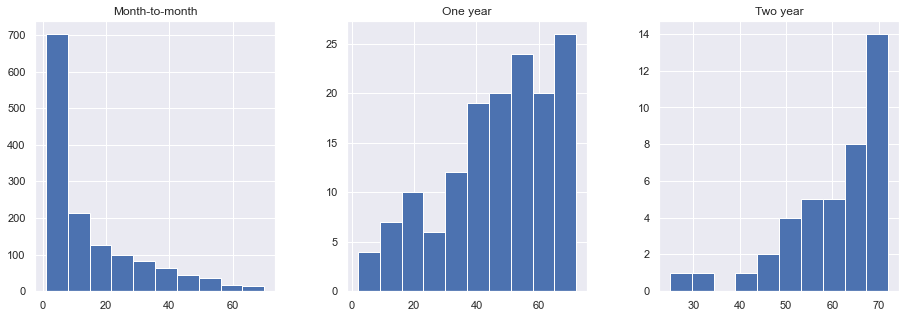

In [24]:
df.query("Churn=='Yes'").tenure.hist(by=df.query("Churn=='Yes'").Contract, layout=(1,3), figsize=(15,5), xrot=1);

*Клиенты, покинувшие компанию, мало заключали годовые и двухгодовые контракты. Основная доля клиентов покидает компанию в течение года (первый столбец на первой гистограмме).*

*Посмотрим на распределение количества клиентов, которые по сей день пользуются услугами компании, по каждому контракту.*

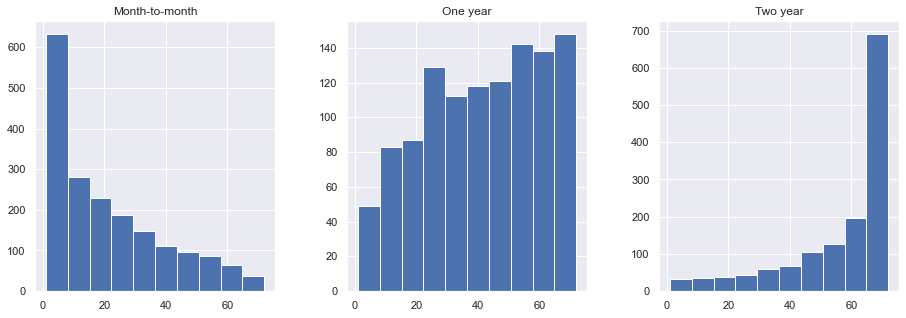

In [25]:
df.query("Churn=='No'").tenure.hist(by=df.query("Churn=='No'").Contract, layout=(1,3), figsize=(15,5), xrot=1);

*Если из тех, кто ушел, мало кто заключал годовые и двухгодовые контракты, то из тех, кто остался, их большое количество. И их количество увеличивалось с каждым годом.*  
*Пользующихся контрактом **Month-to-month** c каждым годом становилось меньше.*

In [26]:
table_Contract = pd.crosstab(df.Contract, df.Churn, margins=True)
table_Contract.style.background_gradient(cmap='autumn_r')

Churn,No,Yes,All
Contract,,,
Month-to-month,1871,1398,3269
One year,1127,148,1275
Two year,1391,41,1432
All,4389,1587,5976


*Покинуло компанию больше тех клиентов, которые используют тип контракта **Month-to-month** (1398 чел.), но нельзя сделать вывод, что уходит больше тех клиентов, которые используют этот тип контракта, потому что общее количество клиентов по категориям различается (выборки несбалансированны). Поэтому посчитаем доли клиентов, покинувших компанию, по каждой категории: **Month-to-month, One year, Two year**.*

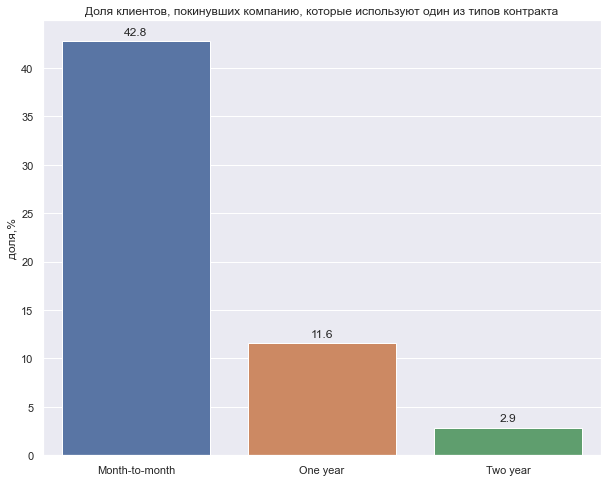

In [27]:
table = table_Contract.iloc[:3,1] / table_Contract.iloc[:3, 2] * 100

splot = sns.barplot(x=table.index, y=table)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
splot.set(xlabel="", ylabel="доля,%", title="Доля клиентов, покинувших компанию, которые используют один из типов контракта");

*Ярко выражена доля клиентов, покинувших компанию, которые используют тип контракта **Month-to-month**. Третью гипотезу не отвергаем. Возможная причина оттока клиентов - клиенты сравнивают качество услуг разных компаний или подключились по акции, поэтому и завершают сотрудничество с компанией.*

#### *Четвертая гипотеза: отток клиентов, пользующихся постоянно одним из методов оплаты, при оплате по которому возникают трудности.*

In [28]:
table_PaymentMethod = pd.crosstab(df.PaymentMethod, df.Churn, margins=True)
table_PaymentMethod.style.background_gradient(cmap='autumn_r')

Churn,No,Yes,All
PaymentMethod,,,
Bank transfer (automatic),1082,224,1306
Credit card (automatic),1104,198,1302
Electronic check,1104,902,2006
Mailed check,1099,263,1362
All,4389,1587,5976


*Покинуло компанию больше тех клиентов, которые используют метод оплаты **Electronic check** (902 чел.). Но нельзя сделать вывод, что уходит больше тех клиентов, которые пользуются этим способом оплаты, потому что общее количество клиентов в этой категории отличается от остальных (только эта категория дает несбалансированность выборок). Поэтому посчитаем доли клиентов, покинувших компанию, по каждой категории: **Bank transfer (automatic), Credit card (automatic), Electronic check, Mailed check**.*

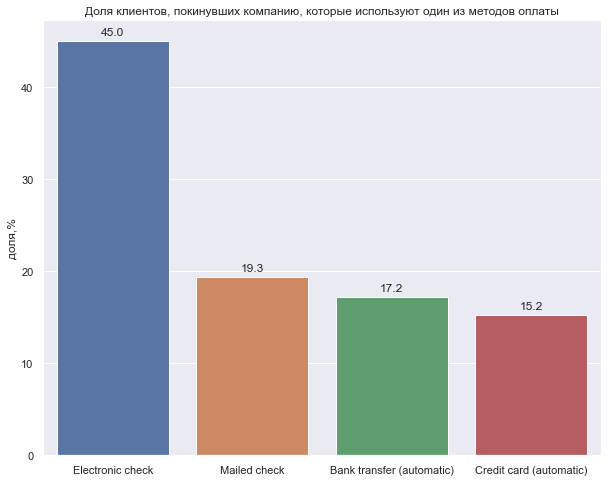

In [29]:
table = (table_PaymentMethod.iloc[:4, 1] / table_PaymentMethod.iloc[:4, 2] * 100).sort_values(ascending=False)

splot = sns.barplot(x=table.index, y=table)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
splot.set(xlabel="", ylabel="доля,%", title="Доля клиентов, покинувших компанию, которые используют один из методов оплаты");

*Мы говорили, что всегда можно переключиться на другой метод оплаты, а график показывает ярко выраженную доля клиентов, покинувших компанию, которые использовали метод оплаты **Electronic check**, тем самым не дает нам отвергнуть четвертую гипотезу.  
**Отсюда сделаем вывод: для проверки влияние этой гипотезы на отток клиентов потребуются статистические методы**.*

*Посмотрим на взаимосвязь между количественными переменными.*

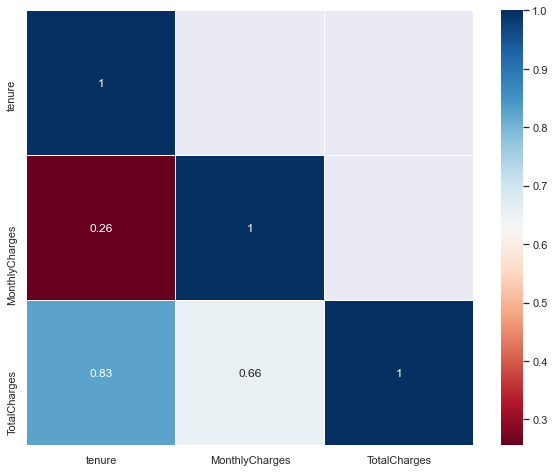

In [30]:
mask = np.ones_like(df.drop(columns='SeniorCitizen').corr().values)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(df.drop(columns='SeniorCitizen').corr(), annot=True, mask=mask, linewidths=0.1, cmap="RdBu");

*Сильно коррелируют между собой переменные **tenure** и **TotalCharges**.  
Выведем на график. Для лучшей читаемости произведем случайную выборку из наших данных, ведь она также отражает наши данные.  
Нормализуем данные методом логарифмирования.*

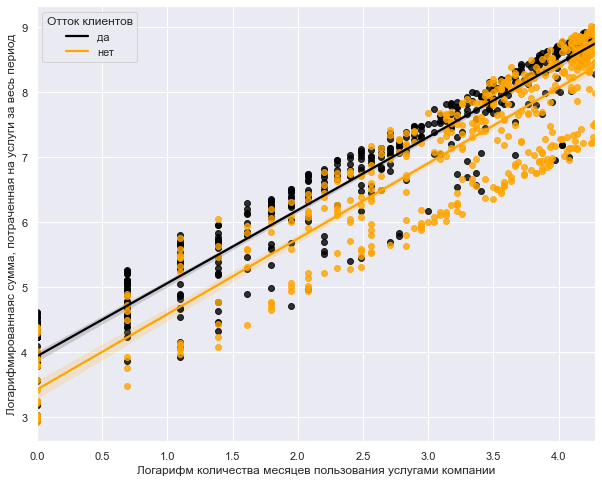

In [31]:
a = df.query("Churn=='Yes'")
b = df.query("Churn=='No'")
a.TotalCharges = a.TotalCharges.transform([np.log])
a.tenure = a.tenure.transform([np.log])
b.TotalCharges = b.TotalCharges.transform([np.log])
b.tenure = b.tenure.transform([np.log])

# возьмем 500 наблюдений
ax = sns.regplot(x='tenure', y='TotalCharges', data=a.sample(500), color='black', label='Yes')
sns.regplot(x='tenure', y='TotalCharges', data=b.sample(500), marker='o', color='orange', label='No')

plt.legend(["да", "нет"], title='Отток клиентов', loc='best')

ax.set_xlabel("Логарифм количества месяцев пользования услугами компании")
ax.set_ylabel("Логарифмированнаяс сумма, потраченная на услуги за весь период");

*Наблюдается положительная корреляция двух переменных.
В среднем сумма, потраченная за услуги клиентами, которые покинули компанию, будет выше, чем у тех, которые продолжают пользоваться услугами. Т.е. покидали компанию те клиенты, которые тратили на услуги много.* 

*Из выше проведенного анализа, обращаясь к гипотезам, можно сказать, что клиенты, покинувшие компанию и тратившие большие суммы на услуги - это клиенты, не получившие нужного качества услуги **Fiber optic** или посчитавшие ее дорогой, использующие контракт **Month-to-month** и решившие попробовать другого провайдера.*

# 3. Построение моделей для прогнозирования оттока

*Для прогнозирования категориальной переменной, имеющей 2 градации, будем использовать алгоритмы классификации.*

In [32]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

*Нормализуем количественные переменные с помощью логарифмирования, категориальные переменные преобразуем в дамми-переменные.*

In [33]:
df_normal_nonbinary = np.log(df[non_categorical_var])
df_binary = pd.get_dummies(df.drop(columns=['Churn']).drop(columns=non_categorical_var))

done_set = pd.concat((df_normal_nonbinary, df_binary), axis=1)

done_set

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,4.276666,3.182212,7.458561,0,1,1,0,0,1,0,...,0,0,0,1,1,0,0,1,0,0
1,3.784190,4.479040,8.287327,1,0,1,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
2,3.637586,4.316821,7.962015,1,0,0,1,0,1,1,...,0,1,0,0,0,1,1,0,0,0
3,1.386294,4.023564,5.474369,0,1,1,0,1,0,1,...,1,1,0,0,0,1,0,0,1,0
4,0.693147,3.978747,4.783316,0,1,1,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,0.000000,4.553877,4.553877,0,1,1,0,0,1,1,...,1,1,0,0,0,1,0,0,1,0
5982,3.135494,4.511958,7.695440,1,0,1,0,0,1,0,...,1,0,0,1,0,1,0,1,0,0
5983,2.484907,3.051640,5.723748,0,1,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
5984,2.484907,4.599655,7.090202,0,1,0,1,1,0,1,...,1,1,0,0,0,1,0,0,1,0


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, roc_curve, recall_score, f1_score

*Классы выходной переменной несбалансированы. Для применения метрики **accuracy** требуется сбалансированность классов, поэтому использовать ее не будем. При несбалансированности классов хорошо подойдет метрика **ROC AUC**. Она показывает, насколько хорошо модель различает классы с точки зрения предсказанной вероятности.*

In [35]:
X = done_set.values
y = df.Churn.apply(lambda x: 1 if x=='Yes' else 0)

# разделение набора данных на обучающий и тестовый
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17, stratify=y)

# применяем функцию StratifiedKFold для разделения данных на обучающие и тестовые наборы данных для перекресной проверки
skf = StratifiedKFold(n_splits=5, random_state=17)

### *Logistic Regression*

In [36]:
lr_params = {"C": np.arange(0.1, 1, 0.01)}

lr_1 = LogisticRegression(random_state=17, class_weight="balanced")

# применяем функцию GridSearchCV для поиска наилучших параметров, показателем оценки берем ROC-AUC
lr_optimization = GridSearchCV(lr_1, lr_params, cv=skf, scoring='roc_auc', n_jobs=-1)
lr_optimization.fit(X, y)

lr_1.set_params(**lr_optimization.best_params_)
score = cross_val_score(lr_1, X, y, cv=skf, n_jobs=-1, scoring='roc_auc').mean()
print(f"roc_auc = {score}")

roc_auc = 0.8478042165418016


*Кривая **ROC AUC** выглядит так. Она показывает, насколько хорошо модель различает классы с точки зрения предсказанной вероятности*

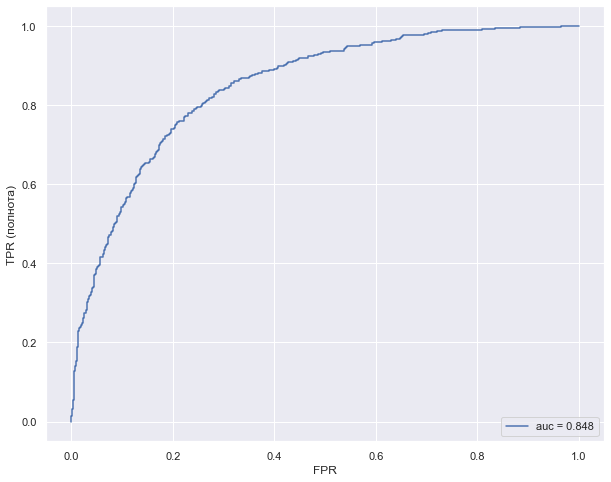

In [37]:
lr_1.fit(x_train, y_train)
x_test_1 = x_test.copy()
y_test_1 = y_test.copy()

probas = lr_1.predict_proba(x_test_1)
fpr, tpr, _ = roc_curve(y_test_1, probas[:, 1])
auc = roc_auc_score(y_test_1, probas[:, 1])
plt.plot(fpr, tpr, label="auc = " + str(np.round(auc, 3)))
plt.xlabel('FPR')
plt.ylabel('TPR (полнота)')
plt.legend(loc=4);

*Вглянем на матрицу ошибок*

In [38]:
confusion_matrix(y_test, lr_1.predict(x_test))

array([[790, 307],
       [ 71, 326]], dtype=int64)

*Мы предсказываем отток клиентов. Т.е. акцентируем внимание на выходных значениях **1(Yes)**.*  
*Из тестового набора данных модель правильно предсказала **326 случаев**. В **71 случае** модель ошиблась, отнесла их к **0(No)**.*  
*Модель выдает очень много ложноотрицательных результатов(**307 случаев**).*  
*Посмотрим на отчет о классификации.*

In [39]:
print(classification_report(y_test, lr_1.predict(x_test)))

              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1097
           1       0.52      0.82      0.63       397

    accuracy                           0.75      1494
   macro avg       0.72      0.77      0.72      1494
weighted avg       0.81      0.75      0.76      1494



*Значение **recall** равно **82%**. Если у компании ресурсов достаточно, то следует поднимать **recall**, чтобы модель могла выявлять большее количество клиентов, которые планируют уйти, для их удержания сотрудничества с компанией. Если ресурсы не дают компании такую полноту действий, то следует улучшать **f1-score**.*

*Можно попытаться поднять **recall**, передвинув границу принятия решения с **50%** до **40%**.*

In [40]:
print(classification_report(y_test, lr_1.predict_proba(x_test)[:, 1] > 0.4))

              precision    recall  f1-score   support

           0       0.94      0.63      0.75      1097
           1       0.46      0.88      0.61       397

    accuracy                           0.70      1494
   macro avg       0.70      0.76      0.68      1494
weighted avg       0.81      0.70      0.72      1494



*В данном случае **recall** поднялся, **precision**, соответственно, упала. Но **f1-score** тоже стал лучше.*

*Вглянем на матрицу ошибок*

In [41]:
confusion_matrix(y_test, lr_1.predict_proba(x_test)[:, 1] > 0.4)

array([[694, 403],
       [ 48, 349]], dtype=int64)

*В такой ситуации модель правильно предсказывает **349 случаев**, ошибается лишь в **48 случаях**.*  
*Но показатель **precision** падает. Количество ложноотрицательных результатов увеличилось с **307 случаев** до **403 случаев**. Таким образом ресурсы компании будут тратится на "ложные предсказания".*

*Попробуем улучшить качество модели с помощью **анализа главных компонент RCA**.*

In [42]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

# применим функцию LabelEncoder для кодирования категориальных переменных в значения 0 и 1
encode = LabelEncoder()
df_encode = df.copy()

for index in df_encode.describe(include=[object]).columns:
    df_encode.loc[:, index] = encode.fit_transform(df_encode.loc[:, index])

df_encode.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,72,1,2,2,1,1,1,1,1,1,2,0,1,24.10,1734.650024,0
1,0,0,0,0,44,1,0,1,0,2,2,0,2,0,0,1,1,88.15,3973.199951,0
2,0,1,1,0,38,1,2,1,0,0,0,0,0,0,0,1,0,74.95,2869.850098,1
3,1,0,0,0,4,1,0,0,0,0,0,0,0,2,0,1,2,55.90,238.500000,0
4,1,0,0,0,2,1,0,0,2,0,2,0,0,0,0,0,2,53.45,119.500000,0


*Применяем PCA-анализ.*

In [43]:
# выделим 2 главные компоненты, масшабируем данные с помощью функции StandardScaler
pca = PCA(n_components=2)
standard = StandardScaler()
df_encode = standard.fit_transform(df_encode)
df_pca = pca.fit_transform(df_encode)

df_encode = pd.DataFrame(df_pca, columns=['first_comp', 'second_comp'])
df_encode['target'] = df.Churn.values
df_encode.head()

,first_comp,second_comp,target
0,1.779373,-2.438076,No
1,0.337597,1.020245,No
2,-1.058132,2.605843,Yes
3,-2.495790,0.603810,No
4,-2.095074,-1.147606,No


*Посмотрим, как выглядят данные двух компонент на графике*

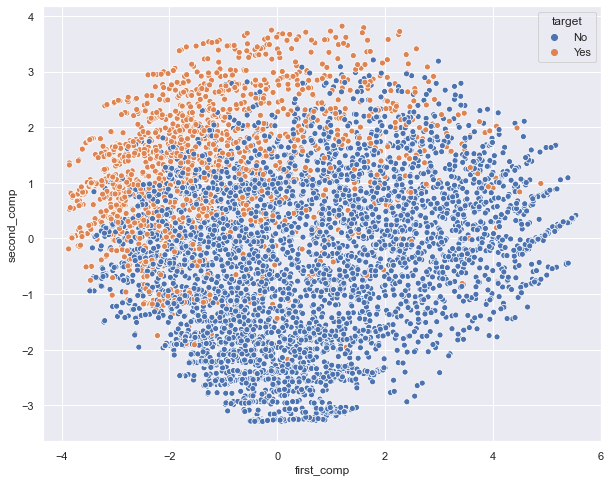

In [44]:
sns.scatterplot(df_encode['first_comp'], df_encode.second_comp, hue=df_encode.target.values)
plt.legend(title="target");

*Данные выглядят неплохо. Большая доля клиентов в обоих категориях не смешаны, что предположительно поможет нам существенно повысить качество модели.*

In [45]:
list_models = dict()

In [46]:
X = df_encode.drop(columns=['target']).values
y = df_encode.target

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17, stratify=y)

lr_params = {"C": np.arange(0.1, 1, 0.01)}

lr = LogisticRegression(random_state=17, n_jobs=-1, class_weight="balanced")

# применяем функцию GridSearchCV для поиска наилучших параметров, показателем оценки берем ROC-AUC
lr_optimization = GridSearchCV(lr, lr_params, cv=skf, scoring='roc_auc', n_jobs=-1)
lr_optimization.fit(X, y)

model = lr.set_params(**lr_optimization.best_params_)
score = cross_val_score(lr, X, y, cv=skf, n_jobs=-1, scoring='roc_auc').mean()
list_models[model] = score

print(f"roc_auc = {score}")

roc_auc = 0.9086824186583492


*Предыдущая модель выдавала качество = 0.8478. PCA помог значительно поднять качество модели.  
Вглянем на матрицу ошибок.*

In [47]:
lr.fit(x_train, y_train)
confusion_matrix(y_test, lr.predict(x_test))

array([[884, 213],
       [ 57, 340]], dtype=int64)

*В предыдущем случае модель правильно предсказывала **326 случаев** и в **71 случае** промахивалась, относя их к **0(No)**.  
Теперь модель правильно предсказывает **340 случаев** и промахивается в **57 случаях**. И количество ложноотрицательных результатов уменьшилось с **307 случаев** до **213 случаев**. С помощью улучшения качества предсказаний модели у компании будет значительно меньше затрат ресурсов на удержание клиентов.*

*Посмотрим на отчет о классификации.*

In [48]:
print(classification_report(y_test, lr.predict(x_test)))

              precision    recall  f1-score   support

          No       0.94      0.81      0.87      1097
         Yes       0.61      0.86      0.72       397

    accuracy                           0.82      1494
   macro avg       0.78      0.83      0.79      1494
weighted avg       0.85      0.82      0.83      1494



*Значение **recall** выросло с **82%** до **86%**. Значение **precision** тоже выросло. И значение **f1-score** выросло с **61%** до **72%**.*  
*Таким образом, нормализация данных и выделение двух главных компонент улучшило результаты предсказания модели.*

*График принятия решения Логистической регрессией с применением метода главных компонент.*

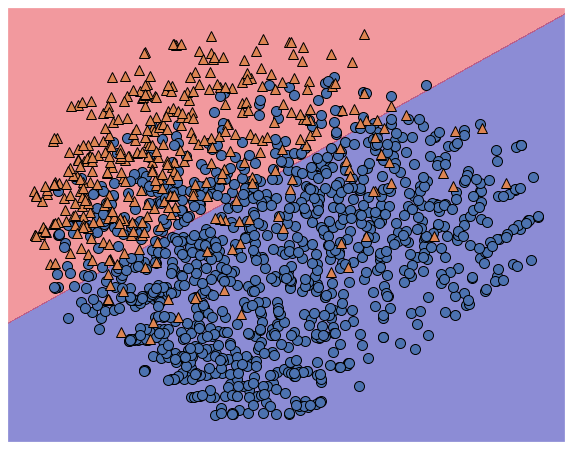

In [49]:
import mglearn

mglearn.plots.plot_2d_separator(lr, x_test, fill=True, eps=0.5, alpha=.4)
mglearn.discrete_scatter(x_test[:, 0], x_test[:, 1], y_test);

*Сравним результаты улучшений предсказания модели.*

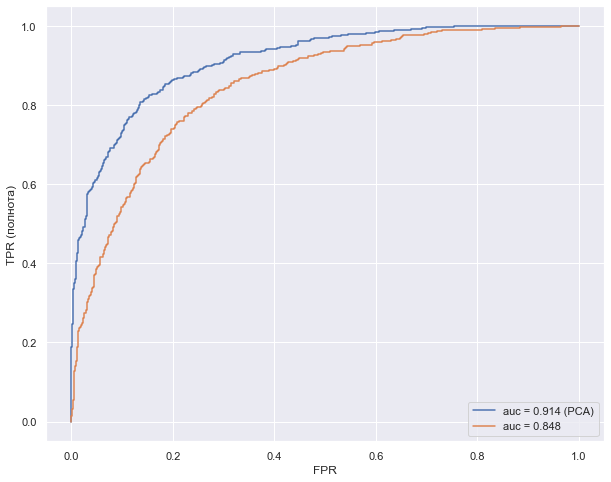

In [50]:
y_test_2 = y_test.transform(lambda x: 1 if x=='Yes' else 0)

probas = lr.predict_proba(x_test)
fpr, tpr, _ = roc_curve(y_test_2, probas[:, 1])
auc = roc_auc_score(y_test_2, probas[:, 1])
plt.plot(fpr, tpr, label="auc = " + str(np.round(auc, 3)) + " (PCA)")
plt.xlabel('FPR')
plt.ylabel('TPR (полнота)')
plt.legend(loc=4)

probas = lr_1.predict_proba(x_test_1)
fpr, tpr, _ = roc_curve(y_test_1, probas[:, 1])
auc = roc_auc_score(y_test_1, probas[:, 1])
plt.plot(fpr, tpr, label="auc = " + str(np.round(auc, 3)))
plt.xlabel('FPR')
plt.ylabel('TPR (полнота)')
plt.legend(loc=4);

*Используя метод главных компонент модель научилась значительно лучше различать классы.*

### *Random forest*

In [51]:
rfc_params = {"n_estimators": list(range(150, 50, -10)), 
              "max_depth": list(range(1, 10))}

rfc = RandomForestClassifier(random_state=17, n_jobs=-1, class_weight="balanced")

# применяем функцию GridSearchCV для поиска наилучших параметров, показателем оценки берем ROC-AUC
rfc_optimization = GridSearchCV(rfc, rfc_params, cv=skf, scoring='roc_auc', n_jobs=-1)
rfc_optimization.fit(X, y)

model = rfc.set_params(**rfc_optimization.best_params_)

score = cross_val_score(rfc, X, y, cv=skf, n_jobs=-1, scoring='roc_auc').mean()
list_models[model] = score

print(f"roc_auc = {score}")

roc_auc = 0.913217514589182


### *Gradient Boosting*

In [52]:
gbc_params = {'learning_rate': np.arange(0.1, 0.6, 0.1), 
              "n_estimators": list(range(100, 0, -10))}

gbc = GradientBoostingClassifier(random_state=17)

# применяем функцию GridSearchCV для поиска наилучших параметров, показателем оценки берем ROC-AUC
gbc_optimization = GridSearchCV(gbc, gbc_params, cv=skf, scoring='roc_auc', n_jobs=-1)
gbc_optimization.fit(X, y)

gbc.set_params(**gbc_optimization.best_params_)

GradientBoostingClassifier(n_estimators=60, random_state=17)

*Подберем оптимальные веса по показателю **F-мера**.*

In [53]:
data_f1_score = pd.DataFrame(columns=["negative", "positive", "score"])
i = 0

for a in np.arange(0.1, 2, 0.1):
    for b in np.arange(0.1, 2, 0.1):
        data_f1_score.loc[i, "negative"] = a
        data_f1_score.loc[i, "positive"] = b
        sample_weights = np.zeros(len(y_train))
        sample_weights[np.unique(y_train, return_inverse=True)[1] == 0] = a
        sample_weights[np.unique(y_train, return_inverse=True)[1] == 1] = b

        gbc.fit(x_train, y_train, sample_weight=sample_weights)
        score_f1 = f1_score(np.unique(y_test, return_inverse=True)[1], 
                            np.unique(gbc.predict(x_test), return_inverse=True)[1])
        data_f1_score.loc[i, "score"] = score_f1
        i += 1

data_f1_score.sort_values(by="score", ascending=False).iloc[0, :]

negative         0.5
positive         0.9
score       0.757282
Name: 84, dtype: object

*По самой высокой оценке выберем веса и зададим их в модели.* 

In [54]:
sample_weights_gbc = np.zeros(len(y_train))
sample_weights_gbc[np.unique(y_train, return_inverse=True)[1] == 0] = 0.5
sample_weights_gbc[np.unique(y_train, return_inverse=True)[1] == 1] = 0.9

model = gbc.fit(x_train, y_train, sample_weight=sample_weights_gbc)

score = cross_val_score(gbc, X, y, cv=skf, n_jobs=-1, scoring='roc_auc').mean()
list_models[model] = score

print(f"roc_auc = {score}")

roc_auc = 0.9131407203397662


### *XGBoost*

In [56]:
xgb_params = {'n_estimators': range(10, 60),
              'eta': np.arange(0.1, 0.6),
              'min_child_weight': range(1, 5),
              'subsample': np.arange(0.1, 0.6)}

weights = np.round(sum(y == "No") / (y.count() - sum(y == "No")), 0)

xgb = XGBClassifier(scale_pos_weight=weights, random_state=17, n_jobs=-1)

# применяем функцию GridSearchCV для поиска наилучших параметров, показателем оценки берем ROC-AUC
xgb_optimization = GridSearchCV(xgb, xgb_params, cv=skf, scoring='roc_auc', n_jobs=-1)
xgb_optimization.fit(X, y)

model = xgb.set_params(**xgb_optimization.best_params_)

score = cross_val_score(xgb, X, y, cv=skf, n_jobs=-1, scoring='roc_auc').mean()
list_models[model] = score

print(f"roc_auc = {score}")

roc_auc = 0.9089598341841348


### *LightGBM*

In [57]:
lgb_params = {"max_depth": list(range(2,10)),
              "learning_rate": list(np.arange(0.1, 0.5, 0.1)),
              "n_estimators": list(range(10, 100, 10))}

lgb = LGBMClassifier(random_state=17, n_jobs=-1, class_weight="balanced")

# применяем функцию GridSearchCV для поиска наилучших параметров, показателем оценки берем ROC-AUC
lgb_optimize = GridSearchCV(lgb, lgb_params, cv=skf, scoring='roc_auc', n_jobs=-1)
lgb_optimize.fit(X, y)

model = lgb.set_params(**lgb_optimize.best_params_)

score = cross_val_score(lgb, X, y, cv=skf, n_jobs=-1, scoring='roc_auc').mean()
list_models[model] = score

print(f"roc_auc = {score}")

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
roc_auc = 0.913245128316027


### *SVM*

In [58]:
from sklearn.svm import SVC

svm_params = {"C": [0.0001, 0.001, 0.01, 0.1, 1],
              "kernel": ["linear", "poly", "rbf", "sigmoid"],
              "degree": [3, 4, 5, 6]}

svm = SVC(random_state=17, class_weight="balanced")

# применяем функцию GridSearchCV для поиска наилучших параметров, показателем оценки берем ROC-AUC
svm_optimize = GridSearchCV(svm, svm_params, cv=skf, scoring='roc_auc', n_jobs=-1)
svm_optimize.fit(X, y)

model = svm.set_params(**svm_optimize.best_params_)

score = cross_val_score(svm, X, y, cv=skf, n_jobs=-1, scoring='roc_auc').mean()
list_models[model] = score

print(f"roc_auc = {score}")

roc_auc = 0.9086746147464515


### *Naive Bayes*

In [59]:
nb = GaussianNB()
score = cross_val_score(model, X, y, cv=skf, n_jobs=-1, scoring='roc_auc').mean()
list_models[nb] = score

print(f"roc_auc = {score}")

roc_auc = 0.9086746147464515


### *K-nearest neighbors*

In [60]:
kn_params = {"n_neighbors": range(2, 10)}

kn = KNeighborsClassifier()

# применяем функцию GridSearchCV для поиска наилучших параметров, показателем оценки берем ROC-AUC
kn_optimize = GridSearchCV(kn, kn_params, cv=skf, scoring='roc_auc', n_jobs=-1)
kn_optimize.fit(X, y)

model = kn.set_params(**kn_optimize.best_params_)

score = cross_val_score(kn, X, y, cv=skf, n_jobs=-1, scoring='roc_auc').mean()
list_models[model] = score

print(f"roc_auc = {score}")

roc_auc = 0.8939844995594113


# 4. Сравнение качества моделей 

*Подготовка таблицы результатов моделей.*

In [61]:
table_models = pd.DataFrame(columns=["name_model", "precision", 
                                     "recall", "f1_score", "roc_auc"])

In [62]:
for enum, name in enumerate(list_models.keys()):
    name = str(name).split("(")[0]
    table_models.loc[enum, ["name_model"]] = name

*Производим подгонку моделей к данным.*

In [63]:
for name in list_models.keys():
    name.fit(x_train, y_train)

gbc.fit(x_train, y_train, sample_weight=sample_weights_gbc)

GradientBoostingClassifier(n_estimators=60, random_state=17)

*Значения **precision_score**, **recall_score**, **f1_score** берем из функции **classification_report**.*  
*Значения **roc_auc** берем из подготовленного нами словаря.* 

In [64]:
for enum, name in enumerate(list_models.keys()): 
    regular_expr = r'0.*'
    reg_expr_compiled = re.compile(regular_expr)

    text = classification_report(y_test, name.predict(x_test))
    lis = reg_expr_compiled.findall(text)
    table_models.loc[enum, ["precision", "recall", "f1_score"]] = lis[1].split("      ")[:3]
    table_models.loc[enum, ["roc_auc"]] = np.round(list_models[name], 4)
    
table_models

,name_model,precision,recall,f1_score,roc_auc
0,LogisticRegression,0.61,0.86,0.72,0.9087
1,RandomForestClassifier,0.67,0.84,0.75,0.9132
2,GradientBoostingClassifier,0.73,0.79,0.76,0.9131
3,XGBClassifier,0.68,0.80,0.74,0.909
4,LGBMClassifier,0.65,0.84,0.73,0.9132
5,SVC,0.61,0.86,0.71,0.9087
6,GaussianNB,0.76,0.66,0.71,0.9087
7,KNeighborsClassifier,0.80,0.67,0.73,0.894


*Чтобы провести отбор модели, нужно учесть ресурсы компании. Если их достаточно, чтобы охватить всех клиентов, которых модель отнесла к уходящим из компании клиентам, то выбирать следует классификатор с самой высокой оценкой по охвату(**recall**). Если ресурсы компании ограничены, и она не может обработать всех клиентов, которых модель отнесла к уходящим из компании клиентам, то тут оптимальным решением будет выбор классификатора с самой высокой оценкой по точности(**precision**), т.к. он будет наиболее точно определять клиентов, которые планируют уйти из компании, чтобы более эффективно направить ресурсы компании на удержание этой доли клиентов. А если нужна "золотая" середина между этих двух показателей, то следует использовать классификатор с самой высокой оценкой по гармоническому среднему recall и precision(**f1**).*